### Time Series: Explore Lesson
**Corey Solitaire**   
10.28.2020

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, opsd_germany_daily
from prepare import prepped_store_df, prepped_energy_df

# Store DF

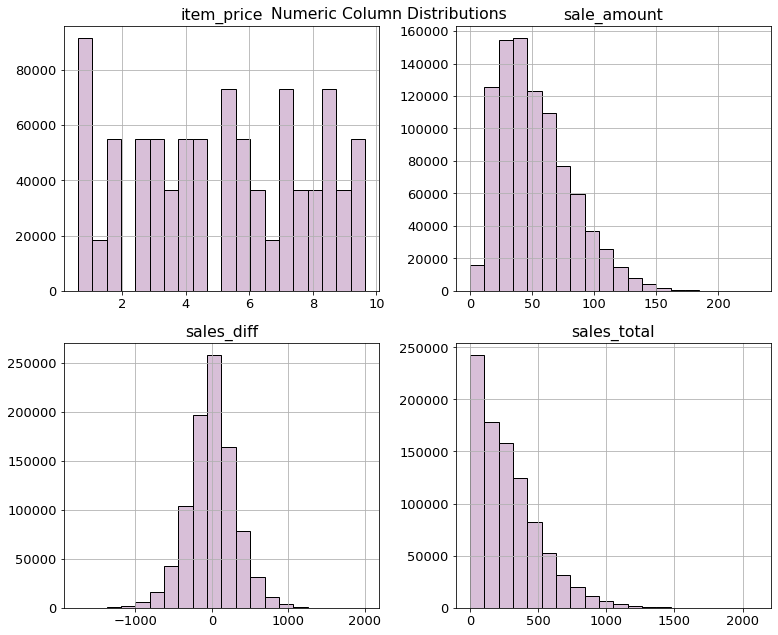

In [2]:
df = get_store_data()
store_df = prepped_store_df(df)

### Using your store items data you prepped in lesson 2 exercises:

#### 1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [3]:
# Call df
df = store_df

In [4]:
# Determine interval of data
df['year'] = df.index.year
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total,sales_diff,year
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN,2013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48,2013
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55,-92.85,2013
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60,328.05,2013
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00,-159.60,2013


#### Human Based Approach

- Data spans from 2013 - 2016, so I will use **2013-2015(Train)** and **2016(Test)**

In [5]:
# Create train df
train = df[:'2015'] # includes 2015
# Create test df
test = df['2016']

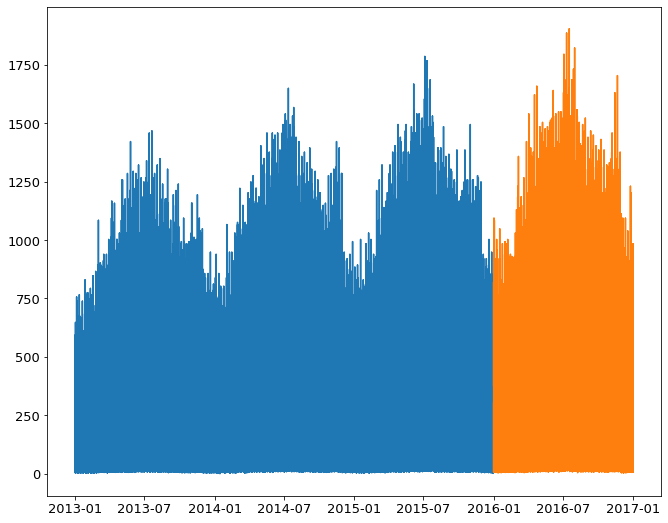

In [6]:
# Visualize df (Sanity Check)
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

#### 2. Validate your splits by plotting X_train and y_train.

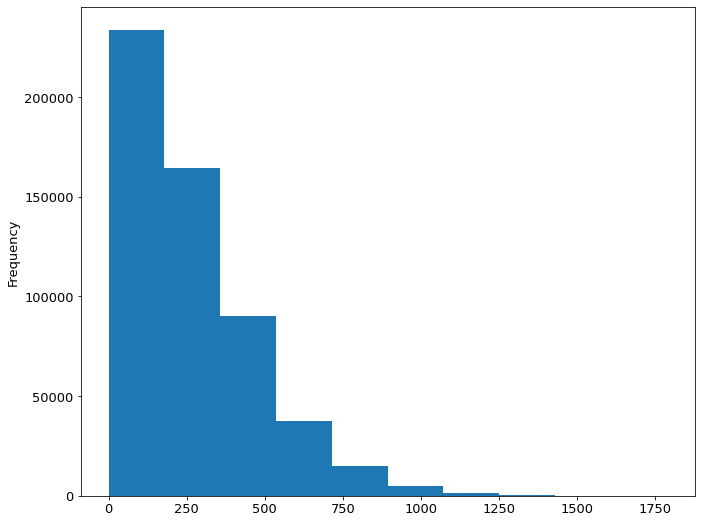

In [7]:
# Visualize y_train
y = train.sales_total
y.plot.hist()
plt.show()

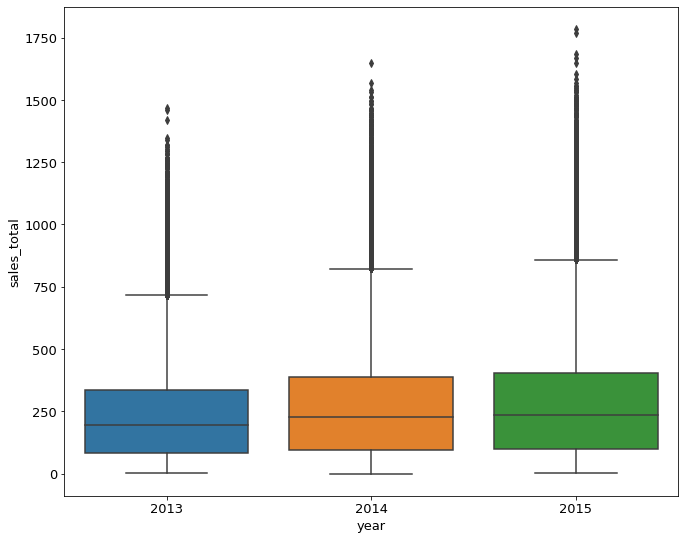

In [8]:
sns.boxplot(data = train, y='sales_total', x='year')
plt.show()

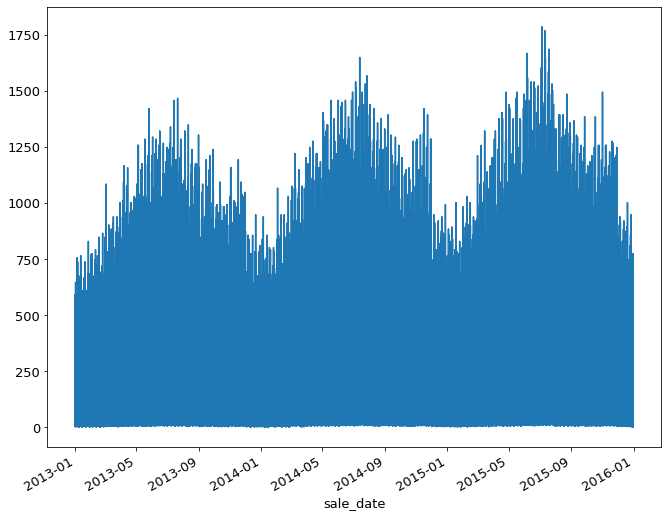

In [9]:
# Plots target variable over time
y.plot()
plt.show()

#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

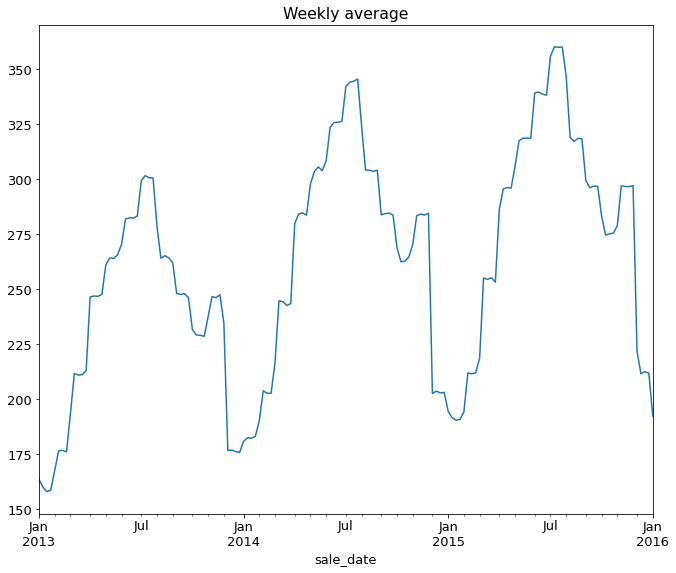

In [10]:
# Weekly average 
y.resample('W').mean().plot(title='Weekly average')
plt.show()

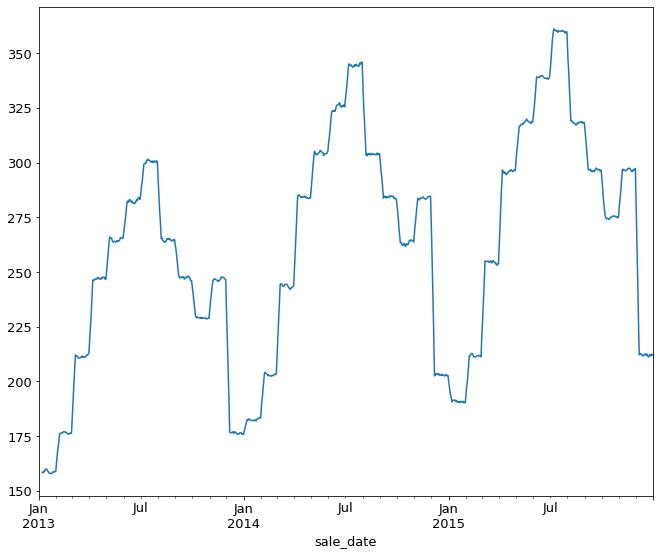

In [11]:
# 7day rolling average
y.resample('D').mean().rolling(7).mean().plot(label='7 day weekly Avg')
plt.show()

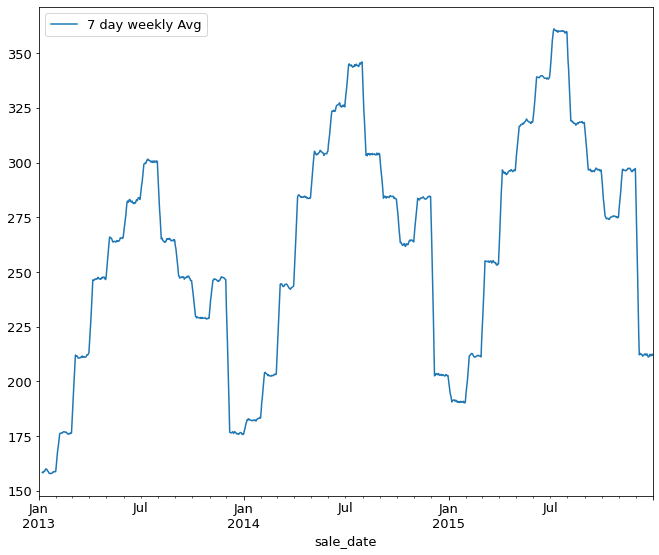

In [12]:
# Also 7 day rolling average (but calculated every hour)?
y.resample('D').mean().rolling(7).mean().plot(label='7 day weekly Avg')
plt.legend()
plt.show()

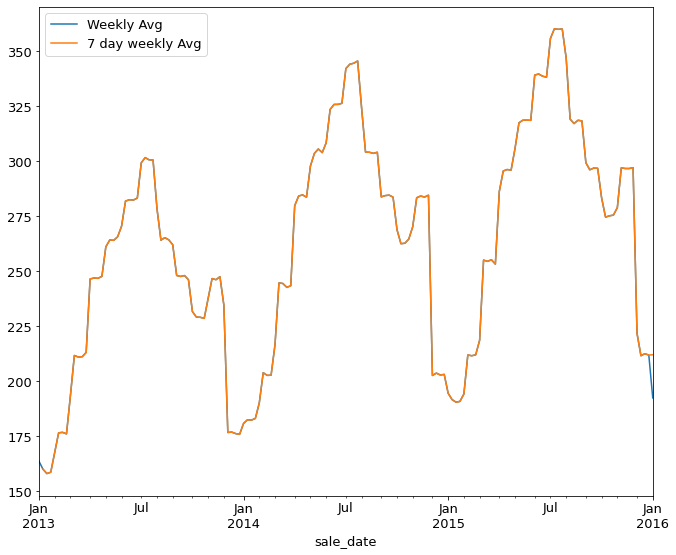

In [13]:
# Both plots together
y.resample('W').mean().plot(label= 'Weekly Avg')
y.resample('D').mean().rolling(7).mean().plot(label='7 day weekly Avg')
plt.legend()
plt.show()

***

`Weekly avg preserves the shape of daily data, but smooths out variability`

***

#### 4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

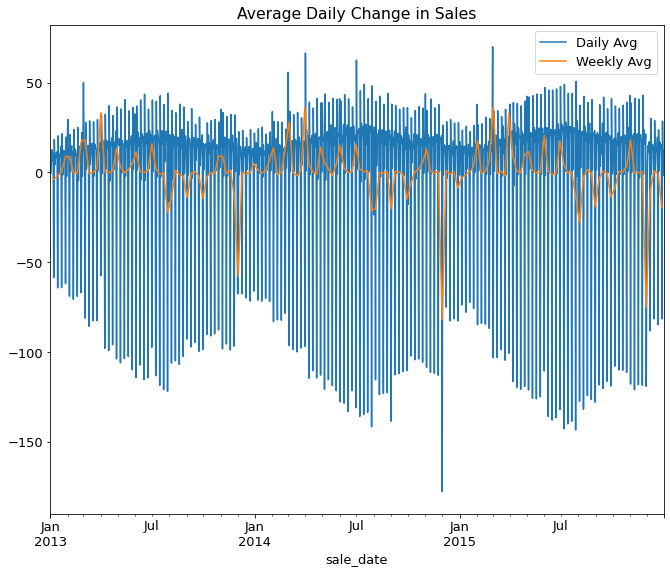

In [14]:
y.resample('D').mean().diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
plt.title('Average Daily Change in Sales')
plt.legend()
plt.show()

***

`Usage appears to trainsition smoothly daily, weekly, monthly, and annually`

***

#### 5. Plot a time series decomposition.

In [15]:
# Decomposition Code DF
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-74.870900,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-76.034334,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-77.275516,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-77.267725,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-72.691208,NaN


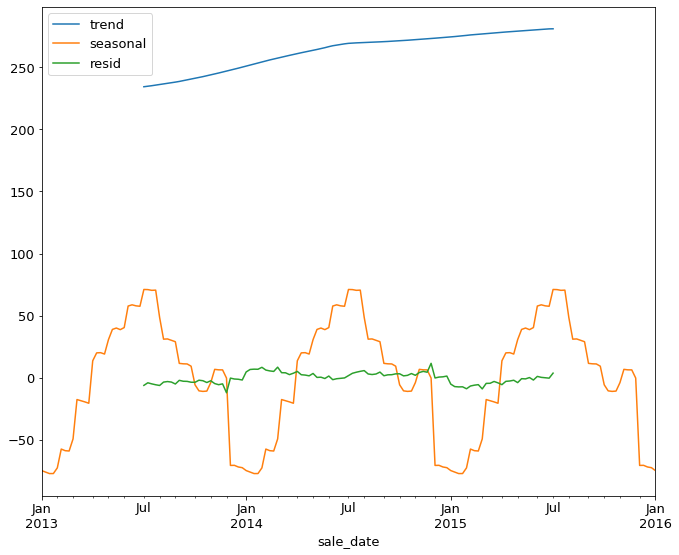

In [16]:
# Decomposition Code: Visual
decomposition.iloc[:, 1:].plot()

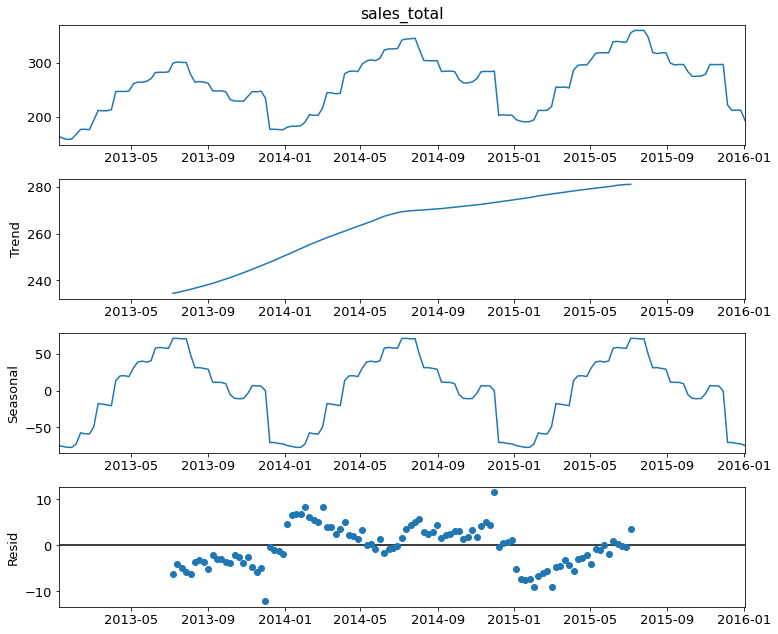

In [17]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

#### 6. Create a lag plot (day over day).

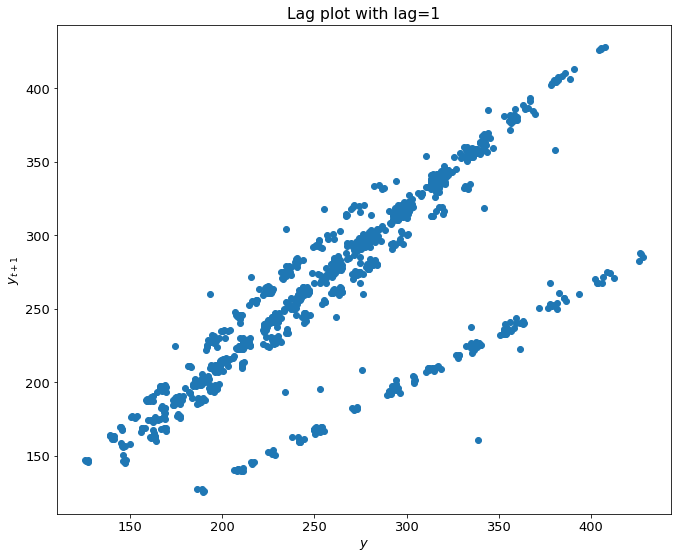

In [18]:
# Each y-value and the next y-value
# ave temp for this hour in relation to the next hour
y = train.sales_total.resample('D').mean()
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')
plt.show()

#### 7. Run a lag correlation.

<function matplotlib.pyplot.show(*args, **kw)>

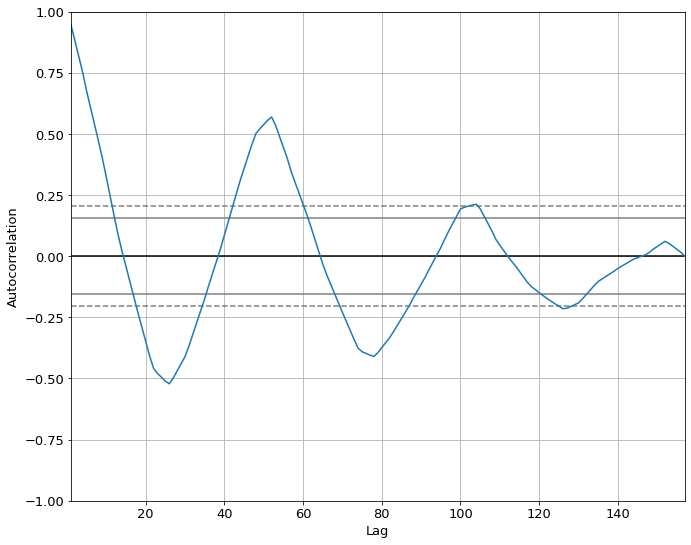

In [19]:
# Autocorrelation Plot
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show

***

`The predictive value of the correlation is only statistically significant for 6 years from today.  In realilty sales this week are only .5 correlated to sales 2 years from now.`

***

# Energy DF

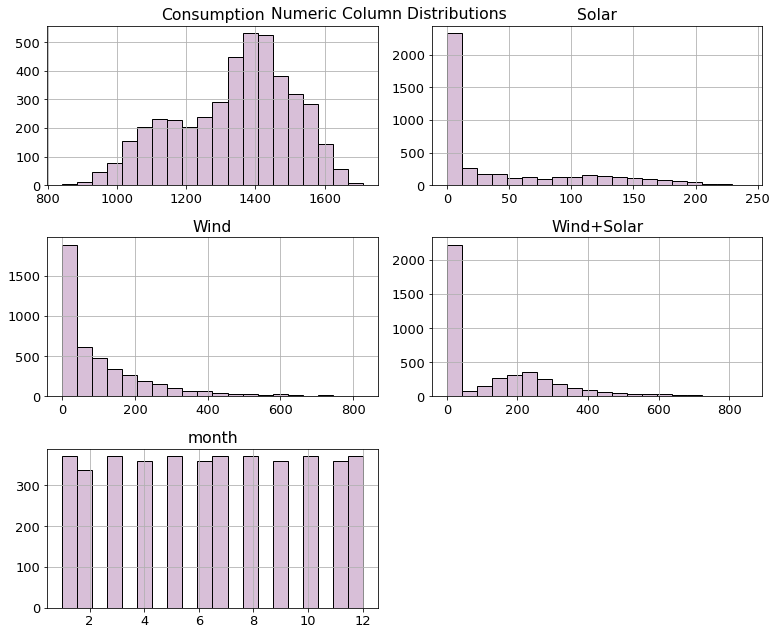

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,1,Monday
2006-01-03,1442.533,0.0,0.0,0.0,1,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,1,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,1,Thursday


In [20]:
df = opsd_germany_daily()
energy_df = prepped_energy_df(df)
energy_df.head()

### Using your OPS data you prepped in lesson 2 exercises:

#### 1. Split your data into train and test using the percent cutoff method.

In [21]:
df = energy_df
# Determine interval of data
df['year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,weekday,year
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,Sunday,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,Monday,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,Tuesday,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,Wednesday,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,Thursday,2006


#### Percent Cutoff Method

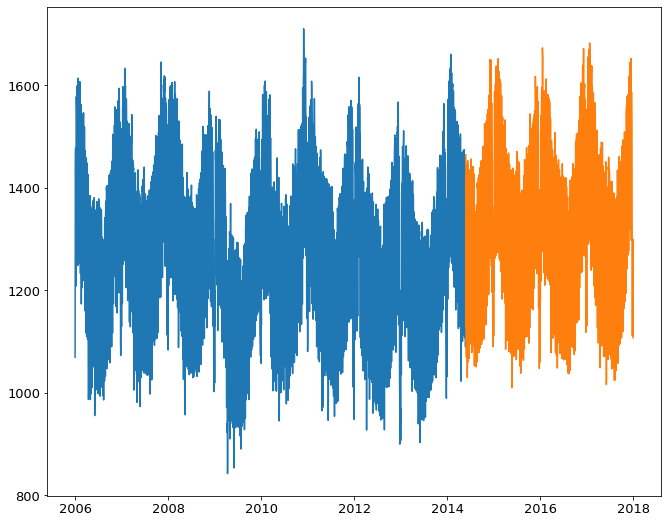

In [22]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)
plt.show()

#### 2. Validate your splits by plotting X_train and y_train.

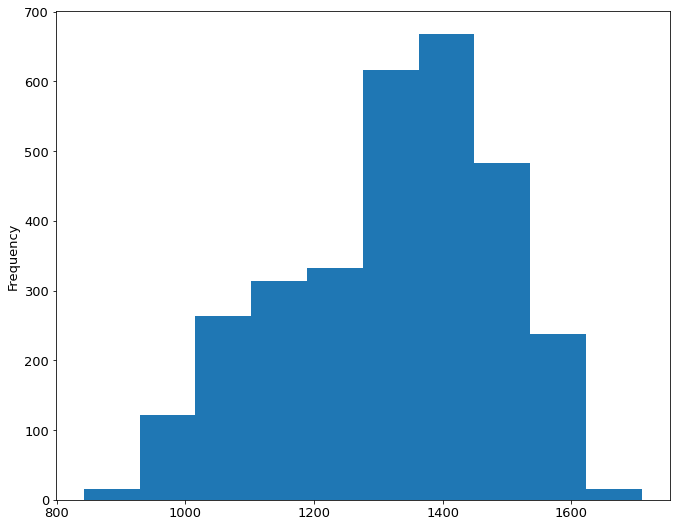

In [23]:
# Visualize y_train
y = train.Consumption
y.plot.hist()
plt.show()

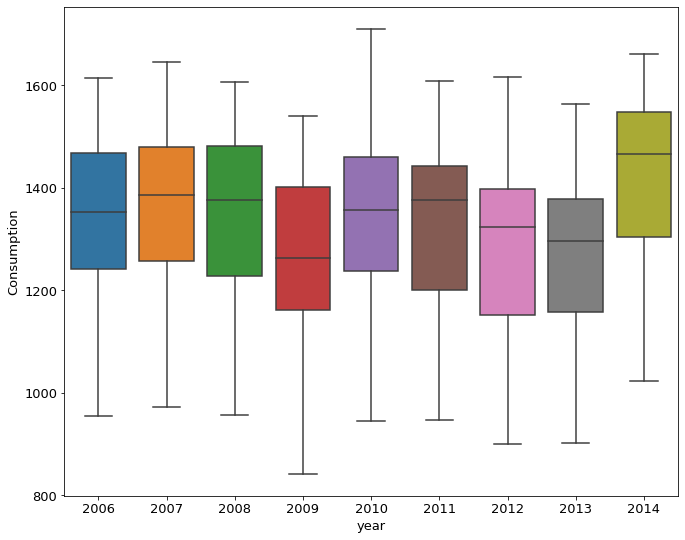

In [24]:
sns.boxplot(data = train, y='Consumption', x='year')
plt.show()

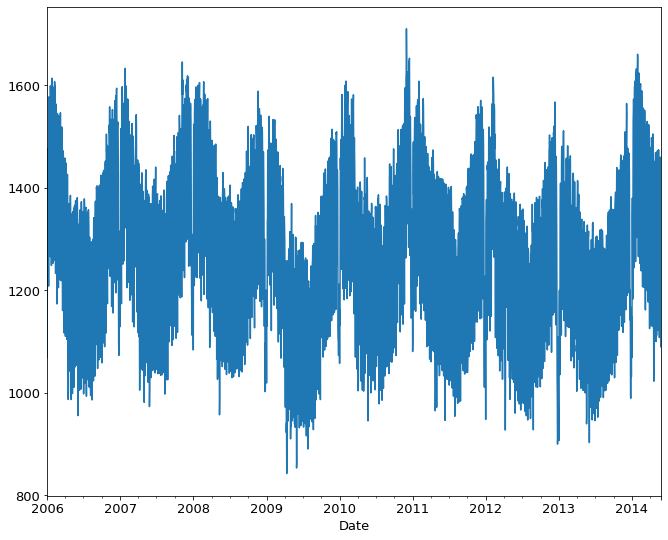

In [25]:
# Plots target variable over time
y.plot()
plt.show()

#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

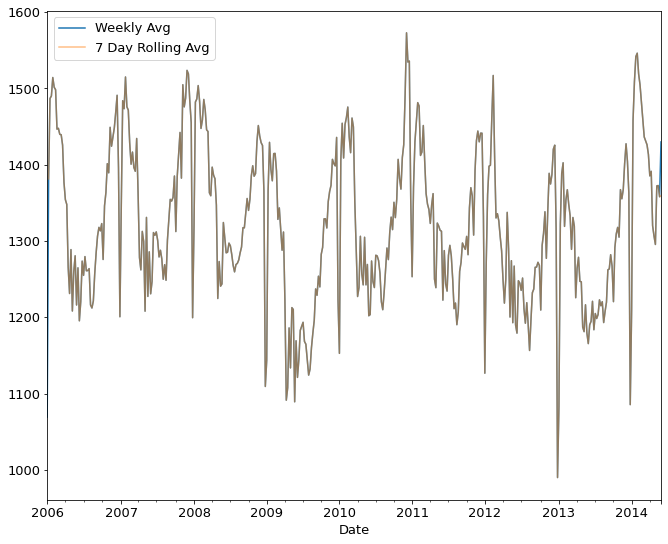

In [26]:
# Both plots together
y.resample('W').mean().plot(label= 'Weekly Avg')
y.rolling(7).mean().plot(label = '7 Day Rolling Avg', alpha = .5)
plt.legend()
plt.show()

#### 4. Group the electricity consumption time series by month of year, to explore annual seasonality.

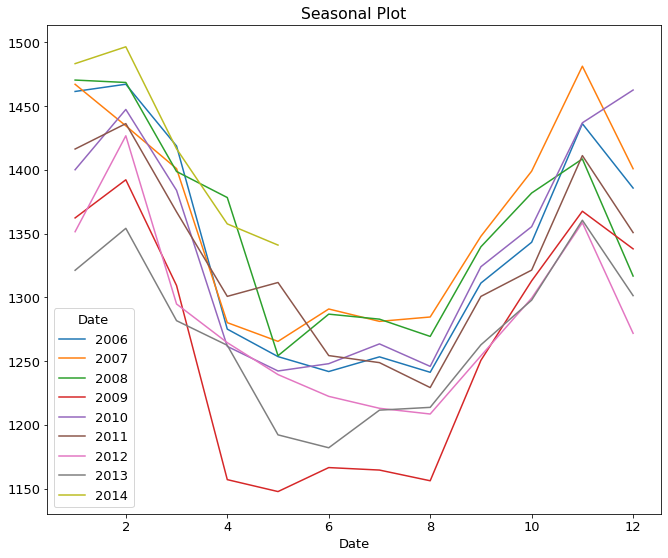

In [27]:
# Seasonal Plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

#### 5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

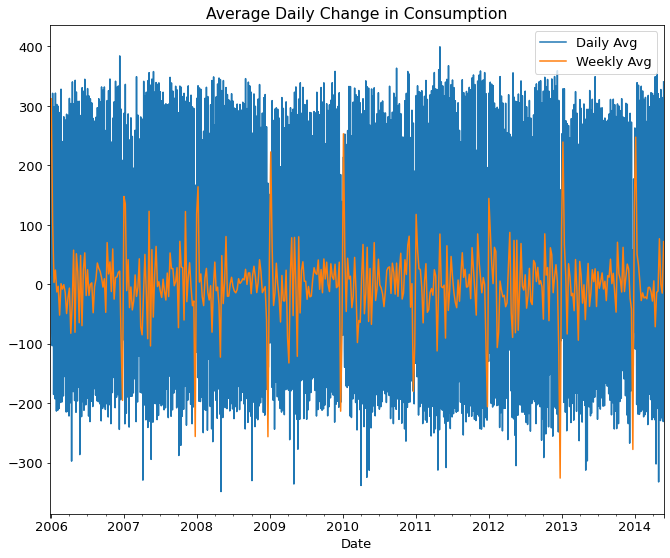

In [28]:
y.resample('D').mean().diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
plt.title('Average Daily Change in Consumption')
plt.legend()
plt.show()

***

`Hard to spot any trends in the data`

***

#### 6. Plot a time series decomposition. Takeaways?

In [29]:
# Decomposition Code DF
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


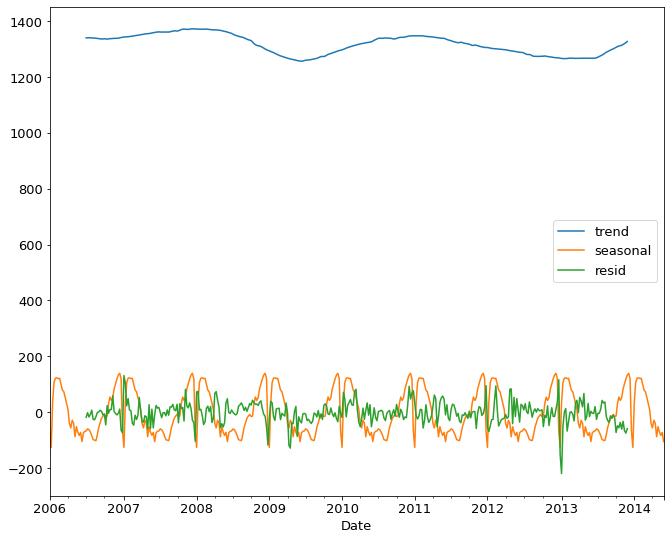

In [30]:
# Decomposition Code: Visual
decomposition.iloc[:, 1:].plot()

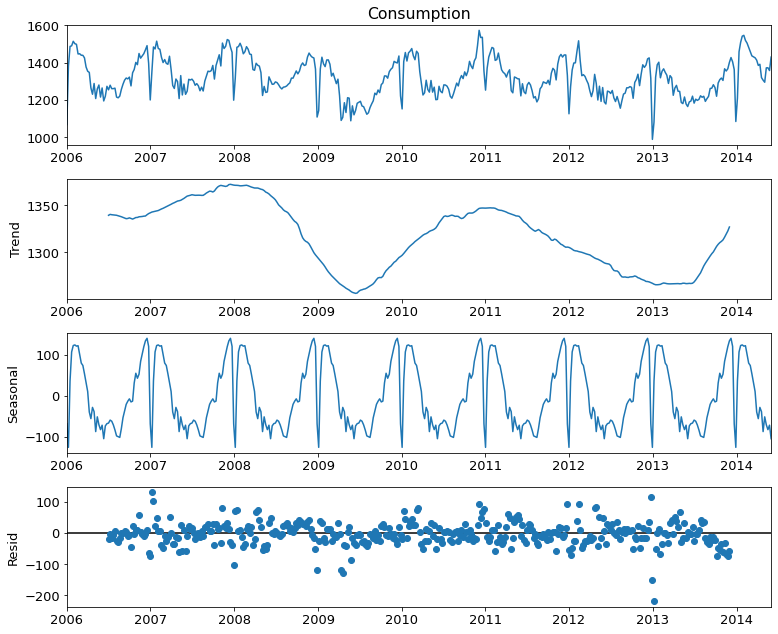

In [31]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Bonus:

If time:

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket. 